23112.299879095164
0.6440828011465476


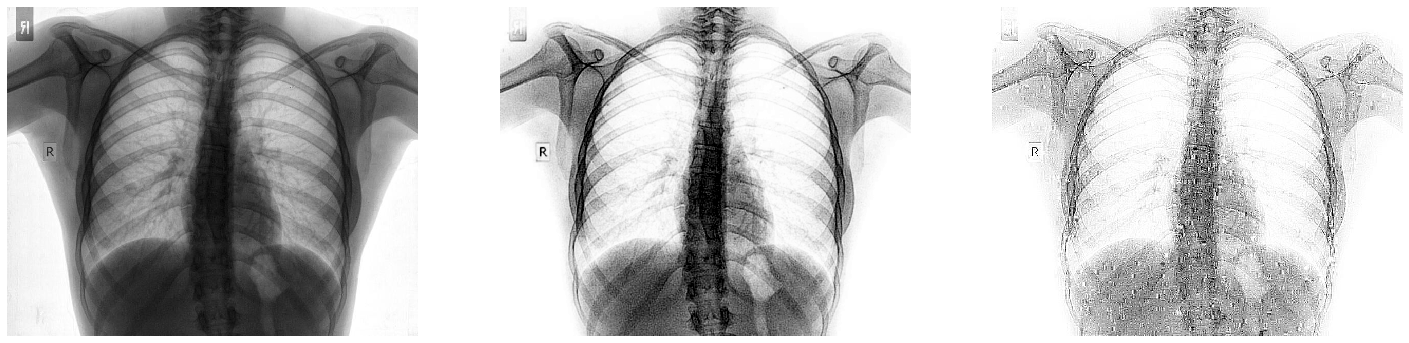

In [103]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
import math
from skimage import metrics as met
import copy

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

img1 = cv.imread('image_1.jpg',0) # loads in grayscale
img2 = cv.imread('image_2.jpg',0) # loads in grayscale

res = copy.copy(img2)

res = cv.add(res.astype('uint8'), -50)

res = cv.GaussianBlur(img2,(5,5),0)

gamma = 0.8
res = res.astype('float')/255
res = res**(1.0/gamma)*255

res = np.abs(255-res)

res = cv.multiply(res.astype('uint8'), 1.5)


print(mse(img1,res))
print(met.structural_similarity(res.astype('float'),img2.astype('float')))


fig, axes = plt.subplots(1, 3, figsize=(25,10))


plt.subplot(131), plt.imshow(np.abs(255-img1), cmap='gray'), plt.axis('off')
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off')
plt.subplot(133), plt.imshow(img2, cmap='gray'), plt.axis('off')
plt.show()